# Graded Challenge 3 - Statistics
### *Marwan Musa - Batch 12*
---

## *Bigquery from Google Cloud Platform*

```sql

SELECT load_time, load_type, load_weight, dropoff_site
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
LIMIT 150000;

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


In [4]:
df.tail()

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00 UTC,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


## *Assignment Problems*

Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. <br>Langkah - langkah analisis :

### 1. Pembersihan Data

In [5]:
df.groupby(['dropoff_site']).describe()

load_weight                                               \
                   count          mean          std      min      25%   
dropoff_site                                                            
CLARKSON             1.0  18640.000000          NaN  18640.0  18640.0   
ELMONT               5.0  15303.400000  9887.499573   5480.0  11720.0   
KRAMER               3.0  11660.000000  7813.245164   3980.0   7690.0   
MRF              89603.0   5305.020334  3675.176552      0.0   2680.0   
PARK BEND          386.0   7517.642487  3866.319134   3750.0   5500.0   
TDS - MRF        54018.0  10118.207764  4400.584695  -4480.0   6700.0   
WILCAB               9.0  11022.222222  6816.321915   2100.0   6360.0   
ZILKER             909.0   9760.959296  5698.256112   1000.0   4000.0   

                                         
                  50%      75%      max  
dropoff_site                             
CLARKSON      18640.0  18640.0  18640.0  
ELMONT        12560.0  14900.0  31857.0  
KRAMER        11400.0  15500.0  19600.0  
MRF            4260.0   6940.0  27320.0  
PARK BEND      5500.0   8500.0  20400.0  
TDS - MRF     10960.0  12900.0  45305.0  
WILCAB        10380.0  13560.0  24060.0  
ZILKER         8750.0  15000.0  75000.0

Berdasarkan data di atas, untuk data "*load weight*" terdapat missing values (NaN), nilai 0 dan negatif. Pada kenyatannya, "*load weight*" sampah dari setiap *dropoff site* ini seharusnya tidak memiliki nilai 0 atau bahkan lebih kecil dari nol.

In [6]:
df[df.load_weight.isnull() == True].load_time.count() + df[df['load_weight'] <= 0]['load_weight'].count()

5222

Setelah dijumlahkan, NaN, 0, dan minus values di data ada sebanyak 5222 data atau sekitar 3.5 persen dari jumalah data awal / *loaded data*. Oleh karenanya, untuk memudahkan dalam eksplorasi analisis lanjutan, kita akan mengimputasi data tersebut dengan mengganti nilainya menjadi median.

In [ ]:
# Langkah 1, Mengubah nilai <= 0 dengan nilai NaN, agar lebih mudah di replace

df['load_weight'][df['load_weight'] <= 0] = np.nan

In [ ]:
# Langkah 2, Seluruh nilai NaN diganti dengan median load_weight dari setiap site

def medianku(i):
    return df[df['dropoff_site'] == i]['load_weight'].median()

for i in df.dropoff_site.unique() :
    df['load_weight'][df['dropoff_site'] == i] = df['load_weight'][df['dropoff_site'] == i].fillna(medianku(i))

In [9]:
df.info() # checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     150000 non-null  object 
 1   load_type     150000 non-null  object 
 2   load_weight   150000 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


### 2. Eksplorasi Data Sederhana.

  - Melihat rentang waktu pengambilan data
  - Ada apa saja tipe load sampah di kota Austin berdasarkan data
  - Mengetahui tempat pembuangan sampah ada dimana saja

*Rentang Waktu Pengambilan Data*

In [10]:
# Mengubah type object ke type datetime agar bisa dihitung range date nya
df['load_time'] =  pd.to_datetime(df['load_time'], infer_datetime_format=True)

# Menghitung range of date
range_date = np.max(df.load_time) - np.min(df.load_time) 
print(f'Rentang waktu pengambilan data : {range_date}')

Rentang waktu pengambilan data : 7836 days 18:28:05


*Tipe Load Sampah*

In [11]:
ltu = df.load_type.unique()
pd.DataFrame({'Tipe Load Sampah' : ltu})

,Tipe Load Sampah
0,RECYCLING - SINGLE STREAM
1,RECYCLING - PAPER
2,RECYCLING - COMINGLE
3,SWEEPING
4,BRUSH
5,TIRES
6,BULK
7,RECYCLED METAL
8,YARD TRIMMING
9,MIXED LITTER


*Dimana Saja Tempat / Site Pembuangan Sampah Kota*

In [12]:
dsu = df.dropoff_site.unique()
pd.DataFrame({'Site Pembuangan Sampah' : dsu})

,Site Pembuangan Sampah
0,MRF
1,ELMONT
2,KRAMER
3,WILCAB
4,ZILKER
5,CLARKSON
6,PARK BEND
7,TDS - MRF


### 3. Insight Untuk Pemerintah Kota Austin, Berdasarkan *Central Tendency Data* Setiap *Site*

In [13]:
# using agg() function on dropoff_site column
df_ctd = df.groupby(['dropoff_site']).agg(Mean=('load_weight', np.mean),
                                        Median=('load_weight', np.median), 
                                        Modus=('load_weight', stats.mode), 
                                        Counts=('load_weight', np.count_nonzero))
            
# Displaying result
display(df_ctd)

,Mean,Median,Modus,Counts
dropoff_site,,,,
CLARKSON,18640.000000,18640.0,"([18640.0], [386])",386
ELMONT,12569.382353,12560.0,"([12560.0], [1458])",1462
KRAMER,11402.468354,11400.0,"([11400.0], [314])",316
MRF,5311.750929,4260.0,"([4260.0], [444])",89625
PARK BEND,7466.691919,5500.0,"([5500.0], [284])",396
TDS - MRF,10120.412070,10960.0,"([12300.0], [169])",54037
WILCAB,10382.098765,10380.0,"([10380.0], [2746])",2754
ZILKER,9647.423828,8750.0,"([15000.0], [290])",1024


Untuk data dengan nilai `counts` yang memiliki nilai hampir sama dengan `mode` maka data tersebut telah mengalami imputasi, sehingga data yang potensial untuk dijadikan insight ke **Pemerintah Kota Austin** hanya ada di site MRF, TDS - MRF, ZILKER

>*Insight* : 
>- Site MRF merupakan site dengan pengambilan sampel terlama (`yang selanjutnya akan saya jadikan alasan kenapa memilih site ini di nomor 4`), namun rata-rata beban muatan / *load_weight* site ini lebih kecil dari yang lain.
>- Rata-rata beban muatan yang kecil ini, bisa mengindikasikan waste management di site ini sangat baik atau *recycling system*-nya mempunyai siklus yang bagus, sehingga load weightnya kecil untuk setiap dropoff sampah.
>- Site MRF, TDS-MRF, dan ZILKER memiliki data yang cukup variatif, karena data yang sama (modus) sangat kecil dibandingkan dengan jumlah datanya (counts), sehingga data dari tiga site ini cukup representatif untuk dijadikan sebagai acuan persebaran data beban muatan / *load weight* dropoff site yang ada di kota Austin.
>- Dari ketiga site yang memiliki data potensial itu (MRF, TDS-MRF, dan ZILKER), beban muatan dengan 15000 load weight di site ZILKER memiliki frekuensi yang paling banyak dan tertingg jika dibandingkan dengan MRF yang hanya 4260 dan TDS - MRF 12300 load weight.

### 4. Pilih Site Paling Menarik (Why?)

In [14]:
# using agg() function on load_time column
df_lt = df.groupby(['dropoff_site']).agg(Minimum_Date=('load_time', np.min), 
                                       Maximum_Date=('load_time', np.max))

# Making a Date_Range column by substracting maximum date with minimum date
df_lt['Date_Range'] = df_lt['Maximum_Date'] - df_lt['Minimum_Date'] 

# Displaying result only for date range column
display(df_lt.Date_Range)

dropoff_site
CLARKSON    1254 days 06:00:00
ELMONT      5838 days 04:03:00
KRAMER      1843 days 06:13:00
MRF         7836 days 18:28:05
PARK BEND   5302 days 16:26:00
TDS - MRF   3936 days 04:27:51
WILCAB      5953 days 22:55:00
ZILKER      5539 days 06:07:01
Name: Date_Range, dtype: timedelta64[ns]

Untuk case ini akan dipilih site **MRF**, karena memiliki rentang waktu pengambilan data terlama dengan jumlah 7836 hari.

### 5. Outlier Checking & Central Tendency Comparison

Gunakan site yang dipilih untuk dicek apakah data `load_weight` ada outlier atau tidak. *Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!*. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

>Langkah-langkah mengeluarkan outlier
>- *fastcheck* apakah di data ada outlier // in a simple way - by visual dengan boxplot
>- Menghitung banyak data outiler dengan menggunakan z-score untuk data berdistribusi normal dan tukey's rule untuk data skew
>- Menghilangkan data outlier berdasarkan perhitungan z-score atau tukey's rule

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='load_weight', ylabel='Density'>

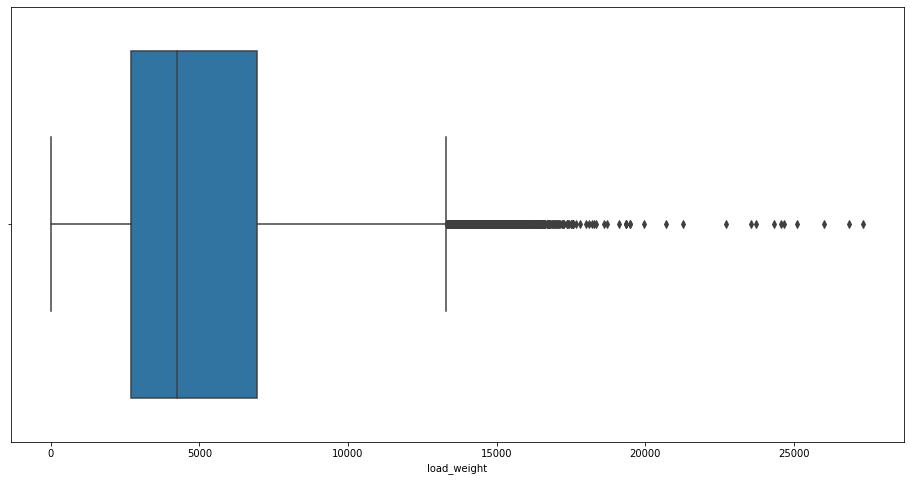

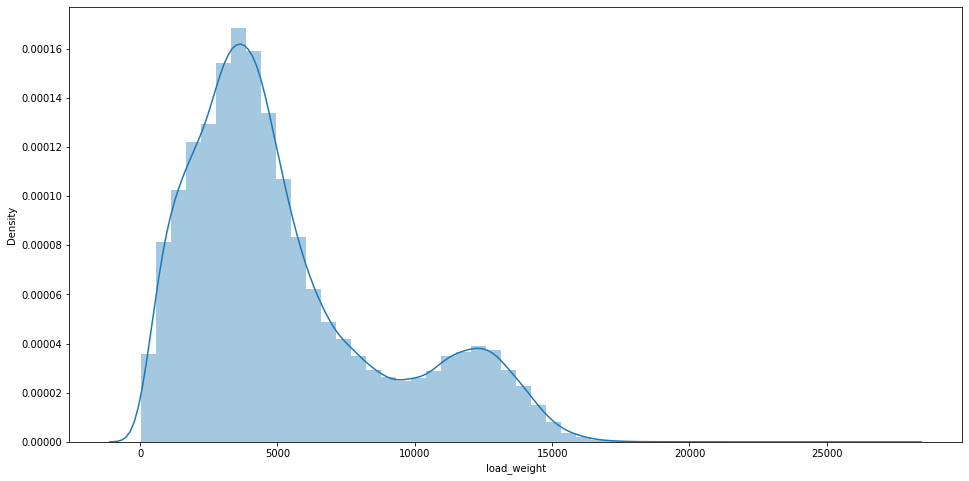

In [15]:
# BoxPlot
fig, ax = plt.subplots(figsize = (16,8))
sns.boxplot(df[df['dropoff_site'] == 'MRF'].load_weight)


# Distribution Plot
fig, ax = plt.subplots(figsize = (16,8))
sns.distplot(df[df['dropoff_site'] == 'MRF'].load_weight)

Berdasarkan dua plot di atas, data load weight di site MRF terdapat outliers dan persabaran datanya right-skewd. Sehingga kita akan menggunakan *Tukey's Rule* untuk menghilangkan outlier datanya.

***Tukey's Rule***

*"Another famous idea by Tukey is how to use his 5-number summary for detecting outlier. The gist is that data that deviates from the median above certain threshold will be flagged as outlier. This formula is only works if the distribution is not normal."*

Fungsi Tukey outlier detection
<center>

${q_{3}+1.5*IQR}$

${q_{1}-1.5*IQR}$

In [16]:
# Membuat fungsi untuk Tukey's Rule
def tukeys_method(df, variable):
    
    # Inputan fungsi : dataframe & nama kolom
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    batas = 1.5*iqr
    batas_bb = q1-batas # batas bawah
    batas_ba = q3+batas # batas bawah
    ol = [] # empty list untuk mengisi nilai outlier x 
    for x in (df[variable]):
        if x <= batas_bb or x >= batas_ba:
            ol.append(x)
    return ol

In [17]:

def outliers(x):
    return tukeys_method(df[df['dropoff_site'] == x], 'load_weight')

# Fungsi untuk mengeluarkan outliers, dengan input site in dropoff_site
df_copy = df.copy()
def dropoutliers(x): 
    df_copy[df_copy['dropoff_site'] == x] = df_copy[df_copy['dropoff_site'] == x][(~df_copy[df_copy['dropoff_site'] == x]['load_weight'].isin(outliers(x)))]
    
dropoutliers('MRF')

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='load_weight'>

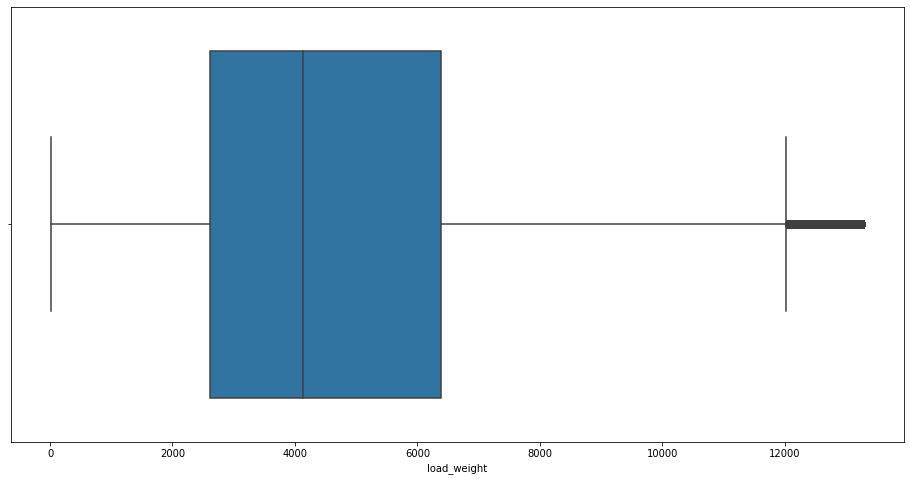

In [18]:
# BoxPlot setelah dihilangkan outlier
fig, ax = plt.subplots(figsize = (16,8))
sns.boxplot(df_copy[df_copy['dropoff_site'] == 'MRF'].load_weight)

***Jumlah outlier (in percentage) :***

In [19]:
diff = '{:0.2f}'.format(( len(outliers('MRF')) / df[df['dropoff_site'] == 'MRF'].load_weight.size )*100)
print(f'Jumlah outlier data load_weight site MRF : {diff} persen')

Jumlah outlier data load_weight site MRF : 4.00 persen


***Perbandingan Central Tendency Sebelum dan Sesudah Outlier Dihilangkan :***

In [20]:
# Central Tendency sebelum outlier dihilangkan // di perhitungan nomor 3
df_ctd = df.groupby(['dropoff_site']).agg(Mean=('load_weight', np.mean),
                                          Median=('load_weight', np.median),
                                          Modus=('load_weight', stats.mode))
                                        
df_ctd[df_ctd.index == 'MRF']

,Mean,Median,Modus
dropoff_site,,,
MRF,5311.750929,4260.0,"([4260.0], [444])"


In [21]:
# Central Tendency setelah outlier dihilangkan
df_ctd1 = df_copy.groupby(['dropoff_site']).agg(Mean=('load_weight', np.mean), 
                                                Median=('load_weight', np.median), 
                                                Modus=('load_weight', stats.mode))

df_ctd1[df_ctd1.index == 'MRF']

,Mean,Median,Modus
dropoff_site,,,
MRF,4937.957406,4140.0,"([4260.0], [444])"


**Perbandingan Central Tendency sebelum dan sesudah outiler dihilangkan :** <br>
*Central tendency sebelum dihilangkan outlier `tidak sama` dengan Central tendency setelah dihilangkan outlier, mean dan median bergeser ke kiri.*

>*Insight* :
>- Dari hasil observasi, ternyata `banyak` data load weight yang `terlampau jauh dari nilai wajar minimum atau maksimum load weight` tiap dropoff, banyak data yang dimaksud berjumlah 3581 data, sedangkan banyak data awal berjumlah 89625. Sehingga, bisa dikatakan bahwa jumlah data tidak wajar ini hanya berkisar **4 persen** dari jumlah data awal di site MRF.

### 6. Measure of Variance

Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data `load_weight`. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (`Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier`).

#### *Range, Variance & Standard Deviation* 

In [22]:
mrf_lw = df_copy[df_copy['dropoff_site'] == 'MRF']['load_weight']
print('Minimum Load Weight : ' + str(mrf_lw.min()))
print('Maximum Load Weight : ' + str(mrf_lw.max()))
print('Range Load Weight : ' + str(mrf_lw.max() - mrf_lw.min()))
print('Variance Load Weight : ' + str('{:0.2f}'.format(mrf_lw.var())))
print('Standar deviasi Load Weight : ' + str('{:0.2f}'.format(mrf_lw.std())))

Minimum Load Weight : 20.0
Maximum Load Weight : 13280.0
Range Load Weight : 13260.0
Variance Load Weight : 10479381.59
Standar deviasi Load Weight : 3237.19


*Insight* :
- Range *Load Weight* sampah untuk site MRF ini adalah 13260 dengan minimum *Load Weight* 20 dan maximum *Load Weight* 13280.
- Jika rata-rata *Load Weight* sampah untuk setiap dropoff di site MRF ini adalah 4937.95, maka *Load Weight* di waktu dropoff lainnya akan berkisar ±3237.19 dari *Load Weight* rata-rata.

### 7. Confidence Interval 

Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan `confidence interval`. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

>Data yang digunakan : rata-rata *beban muatan* / *load weight* dari site MRF, TDS - MRF dan ZILKER (site-site yang memiliki data potensial seperti telah dijelaskan di nomor 3) tanpa outlier. <br>
Confidence Level : 95%

In [23]:
# Akan digunakan for loop untuk menghilangkan outlier di setiap site pilihan kecuali site MRF. karena telah diproses di nomor 5
cols = ['ZILKER', 'TDS - MRF']
for i in cols :
    dropoutliers(i)

In [24]:
data = ['MRF', 'TDS - MRF', 'ZILKER']
for i in data:
    ci = stats.norm.interval(0.95, df_copy[df_copy['dropoff_site'] == i]['load_weight'].mean(), 
                             df_copy[df_copy['dropoff_site'] == i]['load_weight'].std())
    print(f'Confidence Interval dari site {i} : {ci}')
# parameter ci (0.95, a, b) : 
# 0.95 / Confidence Level, 
# a / Rata-rata dari load-weight per site, 
# b / st. deviasi dari load-weight per site.

Confidence Interval dari site MRF : (-1406.8131054262976, 11282.727916453214)
Confidence Interval dari site TDS - MRF : (1652.4101333339204, 18435.867830497293)
Confidence Interval dari site ZILKER : (-170.54345326304974, 19337.624587182894)


Sebelum kita menarik konklusi, perlu diketahui bahwa confidence interval di atas diperoleh dari data *"load weight"*. Namun karena **jumlah *load weight*** **sangat berkorelasi** dengan **kapasitas penampungan suatu site**, artinya setiap kali dropoff dengan **jumlah *load weight* tertentu**, maka kapasitas penampungan suatu site juga *harus memiliki kapasitas sebesar *load weight* itu atau lebih*. 

Oleh karena itu, berdasarkan batas atas terbesar dari 3 confidence interval tersebut. Kapasitas tampung ideal untuk site baru adalah $(19337.62)$ load weight, agar kedepannya dapat menanggulangi lonjakan dropoff load weight yang paling tinggi dalam sehari (`maximum load weight in a day`).

>*Insight* (Rekomendasi untuk Pemerintah Kota Austin terkait pembangunan site baru): <br>
>
> `Kapasitas penampungan` sampah untuk site baru yang akan dibangun nanti, *idealnya* mampu menampung `19337.62 load weight` sampah. ukuran kapasitas site baru ini harusnya bisa menampung `average daily load weight` sampah yang ada di Kota Austin kedepannya. 

### 8. Hypothesis Testing

Buatlah `analisa uji hipotesis` dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (**Ingat!** pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

#### **Single Sample Hypothesis Testing**

Misalkan selama 20 tahun terakhir, di kota Austin setiap hari dropoff sampah rata-rata 8300 load weight dan selama setahun terakhir, sampah di kota itu mencapai rata-rata 8394 load weight per hari. Apakah ini berarti load weight sampah di seluruh site di kota itu meningkat secara signifikan?

In [25]:
# kali ini kita akan memakai dataframe df agar datanya lebih komprehensif, akan diasumsikan bahwa tidak ada data outlier

daily_loadweight = df[['load_time','load_weight']].groupby('load_time').sum()
print('Average New load weight a Day for the last a year: {}'.format(np.round(daily_loadweight['load_weight'].mean())))

Average New load weight a Day for the last a year: 8394.0


Untuk memeriksa apakah daily load weight di Kota Austin meningkat secara signifikan atau tidak, akan dilakukan *single sample one sided* dengan significance level 0,05. Metode ini digunakan karena variabel yang diuji hanya satu dan komparasinya hanya di sampel (data satu tahun terakhir) dan populasi (yang diasumsikan data 20 tahun terakhir).

Jadi hipotesis untuk kasus ini :

**H0: μ <= 8300**

**H1: μ > 8300**

In [26]:
daily_loadweight

,load_weight
load_time,
2000-01-26 12:39:00+00:00,2940.0
2004-08-30 01:26:00+00:00,8580.0
2004-08-30 01:40:00+00:00,4580.0
2004-10-01 01:00:00+00:00,9120.0
2004-10-01 01:03:00+00:00,4340.0
...,...
2021-07-11 07:04:46+00:00,16940.0
2021-07-11 07:05:24+00:00,10960.0
2021-07-11 07:05:51+00:00,10960.0


In [27]:
t_stat,p_val = stats.ttest_1samp(daily_loadweight['load_weight'], 8300)
print('P-value:',p_val/2) # The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 9.04407812129728e-06
t-statistics: 4.2874304731129


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


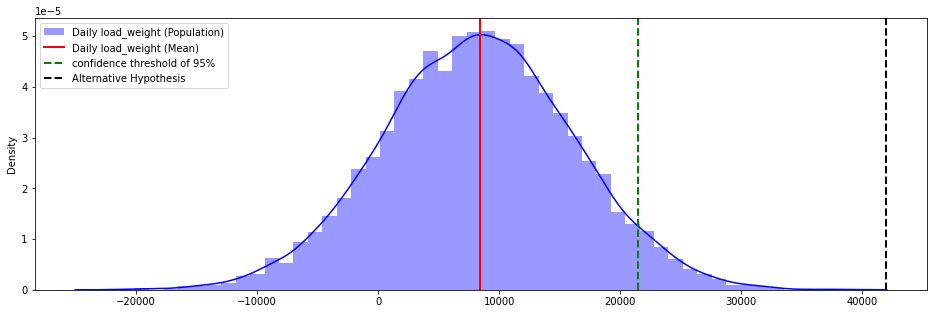

In [28]:
daily_loadweight_pop = np.random.normal(daily_loadweight['load_weight'].mean(), daily_loadweight['load_weight'].std(), 10000)

ci = stats.norm.interval(0.90, daily_loadweight['load_weight'].mean(), daily_loadweight['load_weight'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_loadweight_pop, label='Daily load_weight (Population)', color='blue')
plt.axvline(daily_loadweight['load_weight'].mean(), color='red', linewidth=2, label='Daily load_weight (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_loadweight_pop.mean() + t_stat*daily_loadweight_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

**Karena p-value lebih kecil dari `0.05`, maka reject H0**. <br>


Jadi Kesimpulan atau insight yang dapat disampaikan ke Pemerintah Kota Austin berdasarkan uji hipotesis ini adalah :
<center>

**"*Jumlah load weight sampah di seluruh site di kota itu meningkat secara signifikan satu tahun terakhir.*"**

### 9. Conclusion

Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang telah dilakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan **hindari** bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!

>***KESIMPULAN*** :
>
>
>Data `waste and diversion` ini sangat menarik, karena pengambilan datanya cukup lama yaitu sekitar 21 tahun. Sehingga data-data yang tersaji cukup variatif. Terdapat tujuh site pengolahan sampah yang ada di Kota Austin yaitu ELMONT, KRAMER, WILCAB, ZILKER, CLARKSON, PARK BEND, dan TDS - MRF dan sampah olahan ketujuh site tersebut meliputi brush, tires, bulk, metal, organics, plastic bags, dan sebagainya.
>
>Setelah dilakukan analisis lebih lanjut, data yang sangat potensial untuk dijadikan sebagai representasi permasalahan sampah terutama di beban muatan / load weight tiap dropoff site, hanya data dari site MRF, TDS - MRF, dan ZILKER.
>
>Di site MRF sendiri, cakupan datanya merupakan yang terlama berdasarkan waktu pengambilan atau pengamatannya, dibandingkan site-site lain. Rentang pengambilan datanya adalah 7836 atau sekitar 21 tahun lamanya. Data dari site MRF ini cukup banyak, hingga menarik perhatian kami untuk diolah lebih lanjut.
>
>Walaupun memiliki rentang waktu operasi yang lama, namun site ini memiliki waste management yang baik atau recycling systemnya mempunyai siklus yang bagus, hal ini dapat dilihat dari rata-rata load weight setiap dropoff nya yang begitu kecil dibandingkan site-site lainnya.
>
>Setelah dilakukan observasi lanjutan, terdapat banyak data dengan nilai load weight yang tidak wajar, Jumlahnya 3581 data, namun karena banyaknya data pengamatan, sehingga proporsi data tidak wajar itu hanya berkisar 4 persen dari jumlah data awal yang berkisar 89625 data.
>
>Dari data tersebut, rata-rata load weight sampah untuk site MRF berkisar 4937 load weight tiap dropoff dan variasi load weight di dropoff lainnya berkisar kurang lebih ±3237 dari load weight rata rata. 
>
>Berdasarkan data potensial (data dari site MRF, TDS - MRF, dan ZILKER) yang telah disebutkan sebelumnya, rekomendasi yang bisa kami berikan untuk pemerintah kota Austin jika akan melakukan pembangunan site baru adalah : "Kapasitas penampungan sampah di site baru itu idealnya memiliki kapasitas tampung 19337 load weight atau lebih untuk memfasilitasi average daily dropoff sampah kota."
>
>Penutup, satu fakta menarik dan mungkin akan sangat berguna untuk Pemerintah Kota Austin yaitu : "Dalam satu tahun terakhir, rata-rata load weight sampah untuk kota Austin meningkat secara signifikan dibandingkan dengan data 20 tahun terakhir". Konklusi ini bisa dijadikan sebagai intervensi kebijakan pemerintah kota Austin untuk menekan prilaku konsumtif masyarakat yang menjadi salah satu penyebab naiknya produksi sampah kota.


## *Questions : Pemahaman Konsep!*

#### 1. Apa perbedaan statistik deskriptif dan inferensial?

`"Descriptive statistics summarize the characteristics of a data set. Inferential statistics allow you to test a hypothesis or assess whether your data is generalizable to the broader population."`

Chart Komparasi

| BASIS FOR COMPARISON | DESCRIPTIVE STATISTICS | INFERENTIAL STATISTICS |
| --- | --- | --- |
| Meaning | Bisa dikatakan sebagai Branch of Statistics atau Bagian Statistik yang berkaitan dengan penggambaran dari data yang diteliti. | Statistik untuk penarikan kesimpulan tentang data yang diteliti, berdasarkan observasi dan analisis sampel. |
| What it does? | Handling, analisis dan penyajian data. | Membandingkan, Uji data (Hypothesis Testing dan sebagainya), serta memberikan prediksi berdasarkan data (Regression Analysis dan sebagainya). |
| Form of final Result | Chart, Grafik, Tabel | Probability |
| Function | Menjelaskan data (to summarize // Five Number Summary). | Mengambil kesimpulan dari data, serta bisa dijadikan acuan untuk membuat solusi dari permasalahan yang akan terjadi (to predict) berdasarkan data yang diteliti. (contoh: insight dari data "austin waste and diversion" dijadikan sebagai rekomendasi untuk pembangunan site baru) |

#### 2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?

Metrik dalam central tendency ada 3 yaitu mean, median dan mode. Untuk menyimpulkan data yang terdistribusi normal dan tidak metrik nya tetap sama, namun sifat korelasi antar metrik berbeda untuk data distribusi normal dan non normal. 
- `If a frequency distribution graph has a symmetrical frequency curve, then mean, median and mode will be equal.` <br> Jika $Mean = Median = Mode$, maka data terdistribusi normal.
- `In case of a positively skewed frequency distribution, the mean is always greater than median and the median is always greater than the mode.` <br> Jika $Mean > Median > Mode$, maka data Positif Skew atau Skew Kanan.
- `In case of a negatively skewed frequency distribution, the mean is always lesser than median and the median is always lesser than the mode.` <br> Jika $Mean < Median < Mode$, maka data Negatif Skew atau Skew Kiri.

#### 3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

***Tukey's Rule***, karena datanya **terdistribusi non normal**. <br> Tidak digunakan Z-score karena teknik ini diperuntukkan hanya untuk data yang terdistribusi normal.

#### 4. Apa konsep dibalik central tendency hingga digunakan untuk menyelesaikan langkah pada nomor 7?

Di nomor 7 kita membahas tentang *Confidence Interval*. Dimana, untuk mencari nilai *CI*, kita tinggal memasukkan isi parameter-parameter yang ada di `scipy.stats.norm.interval` yaitu `scipy.stats.norm.interval(a, b, c)` dengan a = alpha, b = mean, c = standar deviasi. Namun, jika ditelaah lebih jauh, mari kita lihat rumus sebenarnya dari confidence interval :
<center>

$CI=\mu±t(\frac{\sigma}{\sqrt{n}})$ <br>

$\mu$ = rata-rata data<br>
$t$ = degrees of freedom (sample size, alpha)<br>
$\sigma$ = standar deviasi<br>
$n$ =  jumlah data

`A confidence interval for the mean is a way of estimating the true population mean. Instead of a single number for the mean, a confidence interval gives you a lower estimate and an upper estimate.` Jadi, besaran nilai rata-rata atau mean dari suatu data populasi sangat berpengaruh terhadap penentuan *CI*. Sebaliknya, *CI* mengindikasikan interval atau range yang didalamnya terdapat mean dari suatu populasi dengan keakuratan 95% (jika diasumsikan cofidence level yang kita ambil $95%$). Karena mean merupakan salah satu metrik central tendency, itulah mengapa Central Tendency Data sangat berkorelasi kuat dengan penentuan Confidence Interval.

#### 5. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

**Uji Hipotesis : *single sample one sided***<br>
Metode ini digunakan jika variabel uji hanya satu dan perbandingannya terletak di sampel dan populasi data yang diasumsikan. Untuk kasus ini, `rata-rata load weight` adalah variabel tunggal yang di uji dan komparasinya hanya di sampel (data satu tahun terakhir) dan populasi (yang diasumsikan data 20 tahun terakhir).